# Revisiting Neural Nets and the Fashion Data Set

Chapter 10 from "Hands on Maching Learning with Scikit-learn, Keras and Tensorflow" by Geron

Using the MNIST Fashion set

Using several Neural Net Systems, including a convolutional neural network (CNN)

Note:  The book discusses Keras from a time when Keras and Tensorflow from a time when Keras and Tensorflow were separate packages

Keras is now entirely within Tensorflow, so the code changes a bit

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

What does this data look like?   Is this flat data or images

In [2]:
X_train_full.shape

(60000, 28, 28)

In [3]:
X_train_full.dtype

dtype('uint8')

In [4]:
y_train_full.shape

(60000,)

Split into test and train, and scale to the range 0-1 as floating point

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

This example is using the keras sequential API to create the model

We will see some alternative approaches to model creation in Keras shortly

The first line in the model flattens the input from 28x28 to a linear array of 784 elements

In [8]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

We'll use model summary to look at the structure

Note-this model has 266,610 fitted parameters in it...

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

Accessing information about the layers in the model

In [12]:
hidden1 = model.layers[1]

In [13]:
weights, biases = hidden1.get_weights()

In [14]:
weights.shape

(784, 300)

In [15]:
weights

array([[-0.02773496, -0.00802758,  0.0738873 , ...,  0.04725776,
         0.05033705,  0.00122352],
       [ 0.01885939,  0.04588819, -0.01682349, ...,  0.0678314 ,
        -0.03067577, -0.04150062],
       [ 0.00079258,  0.06567664,  0.06118095, ..., -0.01030447,
        -0.05516519,  0.06651123],
       ...,
       [-0.02994388,  0.06598555, -0.04224728, ..., -0.01444571,
         0.03809534,  0.02032288],
       [-0.06870545,  0.02228687, -0.05006249, ..., -0.06733651,
        -0.02956121,  0.03827229],
       [ 0.01743324,  0.06066372, -0.004968  , ..., -0.01925364,
         0.06343381,  0.00594452]], dtype=float32)

In the model compile,  the loss function used is "sparse_categorical_crossentropy",  this is a version of cross_entropy that works with "sparse" category labels
meaning that the labels are integer codes, not one hot encoding

That means that we don't need to one-hot encode the input data- yay!

    categorical_crossentropy- one hot encoding
    sparse_categorical_crossentropy-digital encoding

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

### Keras tools for one-hot encoding

There are nice tools in Keras for one-hot encoding,  there is a quick demo,  we won't use these in the model

In [17]:
X_train.shape

(55000, 28, 28)

In [18]:
history = model.fit(X_train, y_train, epochs=30,batch_size=16,validation_data=(X_valid, y_valid))

Epoch 1/30
3438/3438 [==============================] - 8s 2ms/step - loss: 0.4808 - accuracy: 0.8256 - val_loss: 0.3782 - val_accuracy: 0.8638
Epoch 2/30
3438/3438 [==============================] - 8s 2ms/step - loss: 0.3637 - accuracy: 0.8660 - val_loss: 0.3271 - val_accuracy: 0.8832
Epoch 3/30
3438/3438 [==============================] - 8s 2ms/step - loss: 0.3269 - accuracy: 0.8772 - val_loss: 0.3112 - val_accuracy: 0.8880
Epoch 4/30
3438/3438 [==============================] - 8s 2ms/step - loss: 0.3035 - accuracy: 0.8865 - val_loss: 0.3065 - val_accuracy: 0.8858
Epoch 5/30
3438/3438 [==============================] - 8s 2ms/step - loss: 0.2877 - accuracy: 0.8926 - val_loss: 0.3172 - val_accuracy: 0.8836
Epoch 6/30
3438/3438 [==============================] - 8s 2ms/step - loss: 0.2720 - accuracy: 0.8965 - val_loss: 0.3094 - val_accuracy: 0.8866
Epoch 7/30
3438/3438 [==============================] - 8s 2ms/step - loss: 0.2639 - accuracy: 0.8995 - val_loss: 0.3483 - val_accuracy:

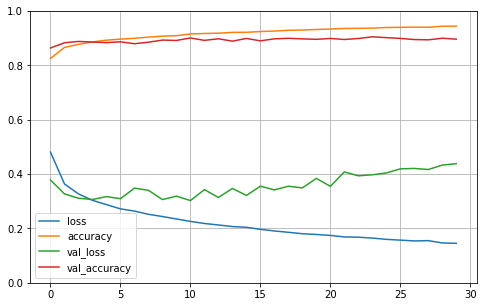

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [20]:
 model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4806 - accuracy: 0.8824


[0.48061132431030273, 0.8823999762535095]

## Adding a tensorboard callback

In [21]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [22]:
# Build and compile your model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30,batch_size=128,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
430/430 [==============================] - 1s 3ms/step - loss: 0.1013 - accuracy: 0.9601 - val_loss: 0.4438 - val_accuracy: 0.9080
Epoch 2/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.9642 - val_loss: 0.4663 - val_accuracy: 0.9072
Epoch 3/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0880 - accuracy: 0.9661 - val_loss: 0.4793 - val_accuracy: 0.9074
Epoch 4/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9674 - val_loss: 0.4933 - val_accuracy: 0.9082
Epoch 5/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0844 - accuracy: 0.9676 - val_loss: 0.4840 - val_accuracy: 0.9080
Epoch 6/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9671 - val_loss: 0.5186 - val_accuracy: 0.9066
Epoch 7/30
430/430 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9677 - val_loss: 0.5200 - val_accuracy: 0.9042
Epoch 

In [23]:
# tensorboard does not shut down cleanly on it's own.  You have to manually delete a file so that it does not restart
# using the previous data set.   Shut it down (on Windows) using this command,   you need to change the user name from hdavi to your
# user name

dir = "C:\\Users\\hdavi\\AppData\\Local\\Temp\\.tensorboard-info"
for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

In [24]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

# Convolutional Neural networks for the same data set

See Geron, chapter 14 for a discussion of CNN


# The CNN expects a channel number, which is not in the current input data

Color images have three channels RGB, so data is usally stored as,  width x height x channel

We will need to reshape the data for the ConvNet so that the number of channels is 1

In [26]:
print(X_test.shape)
print(X_valid.shape)
print(X_train.shape)

(10000, 28, 28)
(5000, 28, 28)
(55000, 28, 28)


In [27]:
X_test=X_test.reshape(10000,28,28,1)
X_valid=X_valid.reshape(5000,28,28,1)
X_train=X_train.reshape(55000,28,28,1)

In [28]:
### Here is the Convolutional Network set up 

In [29]:
modelc = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                        input_shape=[28, 28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [30]:
modelc.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [31]:
modelc.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [32]:
run_logdir_c = get_run_logdir()

In [43]:
# Build and compile your model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = modelc.fit(X_train, y_train, epochs=30,batch_size=64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
860/860 [==============================] - 5s 6ms/step - loss: 0.0503 - accuracy: 0.9853 - val_loss: 0.5702 - val_accuracy: 0.9218
Epoch 2/30
860/860 [==============================] - 5s 6ms/step - loss: 0.0515 - accuracy: 0.9853 - val_loss: 0.5453 - val_accuracy: 0.9224
Epoch 3/30
860/860 [==============================] - 5s 6ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.5603 - val_accuracy: 0.9220
Epoch 4/30
860/860 [==============================] - 5s 6ms/step - loss: 0.0507 - accuracy: 0.9858 - val_loss: 0.5965 - val_accuracy: 0.9212
Epoch 5/30
860/860 [==============================] - 5s 5ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.6076 - val_accuracy: 0.9230
Epoch 6/30
860/860 [==============================] - 5s 5ms/step - loss: 0.0503 - accuracy: 0.9856 - val_loss: 0.5438 - val_accuracy: 0.9220
Epoch 7/30
860/860 [==============================] - 5s 6ms/step - loss: 0.0535 - accuracy: 0.9856 - val_loss: 0.5583 - val_accuracy: 0.9250
Epoch 

In [34]:
 modelc.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4072 - accuracy: 0.9178


[0.40720805525779724, 0.9178000092506409]

In [35]:
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 29932), started 0:42:41 ago. (Use '!kill 29932' to kill it.)

## ResNet-34

This is a Residual Network (see Geron chapter 14), aka a ResNet

it has a "skip layer" connection implmented in the the keras API so that there is a skipping of layers from convolutions to the classifier layer

In [36]:
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides,
                                padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1,
                                padding="same", use_bias=False),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides,
                                    padding="same", use_bias=False),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [37]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(64, 7, strides=2, input_shape=[224, 224, 3],
                              padding="same", use_bias=False))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation("relu"))
model2.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model2.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model2.add(keras.layers.GlobalAvgPool2D())
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(10, activation="softmax"))

In [38]:
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [40]:
# Watch Tensorboard (above) as this model is fitted, it will show the fitting progress graph in real-time as it runs

In [45]:
# Build and compile your model
logdir2=get_run_logdir()
tensorboard_cb2 = keras.callbacks.TensorBoard(logdir2)

history = modelc.fit(X_train, y_train, epochs=30,batch_size=64,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb2])

Epoch 1/30
860/860 [==============================] - 5s 6ms/step - loss: 0.0370 - accuracy: 0.9892 - val_loss: 0.6404 - val_accuracy: 0.9152
Epoch 2/30
860/860 [==============================] - 5s 5ms/step - loss: 0.0386 - accuracy: 0.9893 - val_loss: 0.6439 - val_accuracy: 0.9196
Epoch 3/30
860/860 [==============================] - 5s 5ms/step - loss: 0.0421 - accuracy: 0.9880 - val_loss: 0.7158 - val_accuracy: 0.9212
Epoch 4/30
860/860 [==============================] - 5s 5ms/step - loss: 0.0327 - accuracy: 0.9916 - val_loss: 0.7641 - val_accuracy: 0.9208
Epoch 5/30
860/860 [==============================] - 5s 5ms/step - loss: 0.0346 - accuracy: 0.9901 - val_loss: 0.7646 - val_accuracy: 0.9260
Epoch 6/30
860/860 [==============================] - 5s 5ms/step - loss: 0.0303 - accuracy: 0.9913 - val_loss: 0.8050 - val_accuracy: 0.9244
Epoch 7/30
860/860 [==============================] - 5s 6ms/step - loss: 0.0515 - accuracy: 0.9869 - val_loss: 0.6588 - val_accuracy: 0.9242
Epoch 

In [46]:
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 29932), started 0:57:36 ago. (Use '!kill 29932' to kill it.)

In [ ]:
%load_ext watermark
%watermark

In [ ]:
%watermark --iversions